## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##Data preparation

In [ ]:
# load in the file
df_grades = pd.read_csv('gdrive/My Drive/hw3_aris/ApplicantsInfo.txt',  header = None, skiprows=1, delim_whitespace=True)

In [ ]:
# average the grades to two decimals 
df_grades['average'] = df_grades.sum(numeric_only = True, axis = 1)/((df_grades.shape[1] - 2))
df_grades['average'] = np.round(df_grades['average'], decimals=2)

# remove columns that are not needed
df_grades = df_grades.drop(df_grades.iloc[:,2:-1], axis=1)

# rename first two column names to first and last name
df_grades = df_grades.rename(columns=str).rename(columns={'0': 'first name', '1': 'last name'})

## Question 1
**Try solving the problem mentioned above using three different sorting algorithms (do not use any MapReduce algorithm). (Note: Built-in Python functions (like .mean, .sort, etc.) are not allowed to be used. You must implement the algorithms from scratch).**

For this question, we implement the following three sorting algorithms:
* **Selection sort:** Selection sort is a simple algorithm that uses an empty list to store the sorted values. It loops over the given list and finds the maximum value. This value will be placed in the empty list and removed from the given list. This loop is continued until the given list is empty and the sorted list contains all the values.
* **Bubble sort:** Bubble sort swaps two adjacent elements if they are in the wrong order. If they are correctly sorted, they will not be swapped. If none of the elements are swapped in a loop, everything is sorted correctly and the algorithm can be terminated early.
* **Merge sort:** Merge sort is a recursive algorithm and is based on the divide and conquer method. It will divide the dataset into two equal lists and will continue this process until every list only consists of one element. Then it will start sorting the lists.

### Selection sort

In [ ]:
# FOR ARRAY
def selection_sort(sort_df):
  # give index of average
  firstname = 0
  lastname = 1
  average = 2

  # make numpy array of dataframe
  # looping over numpy array is quicker than looping over df
  sort_df = np.array(sort_df)

  # loop over the dataframe
  for i in range(len(sort_df)):
    # set the min_index
    max_ind = i

    # loop over rest of dataframe after index
    for element in range(i+1, len(sort_df)):

      # select the index with the minimum element
      if sort_df[element][average] > sort_df[max_ind][average]:
        max_ind = element
      
      #check if the value is the same.
      # in that case look at the first name to sort
      elif sort_df[element][average] == sort_df[max_ind][average] and sort_df[element][firstname] < sort_df[max_ind][firstname]:
        max_ind = element
    
    # swap the next max to the place above
    sort_df[[i, max_ind]] = sort_df[[max_ind, i]]
   
  # return the sorted df
  return sort_df

### Bubble sort

In [ ]:
def bubble_sort(sort_df):
  # give index of average
  firstname = 0
  lastname = 1
  average = 2

  # determine length of dataset
  n = len(sort_df)
 
  # loop through complete dataset
  for i in range(n):
    # initialize swapped
    swapped = False
 
    # Last i elements are already in place
    for element in range(0, n-i-1):
 
      # compare two average grades
      # swap if element is smaller than next one
      if sort_df[element][average] < sort_df[element+1][average]:
        # swap the next max to the place above
        sort_df[[element, element+1]] = sort_df[[element+1, element]]
        swapped = True
      
      #check if the value is the same.
      # in that case look at the first name to sort
      elif sort_df[element][average] == sort_df[element+1][average] and sort_df[element][firstname] > sort_df[element+1][firstname]:
        sort_df[[element, element+1]] = sort_df[[element+1, element]]
        swapped = True
      
    # IF no two elements were swapped by inner loop, then break
    if swapped == False:
        break

  return sort_df

### Merge sort


In [ ]:
def merge(dataset, begin, half, end):
  # give index of average
  firstname = 0
  lastname = 1
  average = 2

  # define the index of two subsets that need to be merged
  i1 = half - begin + 1
  i2 = end - half
  
  # create temporary dataframes
  Left = np.zeros([i1, 3], dtype= object)
  Right = np.zeros([i2, 3], dtype=object)


  # Copy data to temp dataframes 
  for i in range(0, i1):
    Left[i] = dataset[begin + i]
 
  for j in range(0, i2):
    Right[j] = dataset[half + 1 + j]
 
  # Merge the temp dataframes back into dataset
  i = 0     # Initial index of first dataframe
  j = 0     # Initial index of second dataframe
  k = begin     # Initial index of merged dataframe

  # check if the value of left is bigger than right
  while i < i1 and j < i2:
    if Left[i][average] > Right[j][average]:
      dataset[k] = Left[i]
      i += 1
    
    # check if the values are the same, but if alphabetical order matters
    elif Left[i][average] == Right[j][average] and Left[i][firstname] <= Right[j][firstname]:
      dataset[k] = Left[i]
      i += 1

    # situation where right is bigger than left value
    else:
      dataset[k] = Right[j]
      j += 1
    
    # update index for dataset
    k += 1
 
  # See if there are any elements in Left that have to be in the dataset
  while i < i1:
    dataset[k] = Left[i]
    i += 1
    k += 1
 
  # See if there are any elements in Right that have to be in the dataset
  while j < i2:
    dataset[k] = Right[j]
    j += 1
    k += 1
  
def merge_sort(dataset, begin, end):

  # make numpy array of dataframe
  # looping over numpy array is quicker than looping over df
  #dataset = np.array(dataset)
  
  # stop running if the begin value is the same as the end value
  if begin < end:
 
  # define cut off point
    half = begin+(end-begin)//2
 
    # Sort first and second halves using same function 
    merge_sort(dataset, begin, half)
    merge_sort(dataset, half+1, end)
    # merge the datasets
    merge(dataset, begin, half, end)
      
  return dataset

### Save the dataframe

In [ ]:
def save_data(dataset):
  dataset.to_csv('dataset.txt', sep='\t')

## Question 2
**What is the time complexity of each algorithm you have used?**

The time complexity of the algorithms are as follows:


Algorithm | Time Complexity
--- | ---
**Selection sort** | Best: Ω(n^2)
                  | Average: θ(n^2)
                  | Worst: O(n^2)
**Bubble sort** | Best: Ω(n)
                | Average: θ(n^2)
                |Worst: O(n^2)
**Merge sort** | Best: Ω(nlog(n))
               |Average: θ(nlog(n))
               | Worst: O(nlog(n))


For our dataset, n = 5000 (equal to the amount of students that did all the tests).

## Question 3
**Evaluate the time taken for each of your implementations to answer the query stored in the ApplicantsInfo.txt file and visualize them.**

As we can see in the plot at the end of the question, we see that merge sort has the shortest run time with 2.34 seconds, as expected. However, bubble sort seems the slowest, while we would have expected it to be at least as quick as merge sort. It could be that for how we have implemented bubble sort right now, it has to run more lines of code for each data point, which could make it slower than merge sort.

In [ ]:
import time

# run merge sort and print time
start_time = time.time()
df_sorted_merge = merge_sort(np.array(df_grades), 0, len(df_grades)-1)
merge_time = (time.time() - start_time)
print("--- %s seconds ---" % merge_time)

--- 2.3443410396575928 seconds ---


In [ ]:
# Run bubble sort and print time
start_time = time.time()
df_sorted_bubble = bubble_sort(np.array(df_grades))
bubble_time = (time.time() - start_time)
print("--- %s seconds ---" % bubble_time)

--- 5634.758148193359 seconds ---


In [ ]:
# Run selection sort and print time
start_time = time.time()
df_sorted_selection = selection_sort(df_grades)
selection_time = (time.time() - start_time)
print("--- %s seconds ---" % selection_time)

--- 1223.811371088028 seconds ---


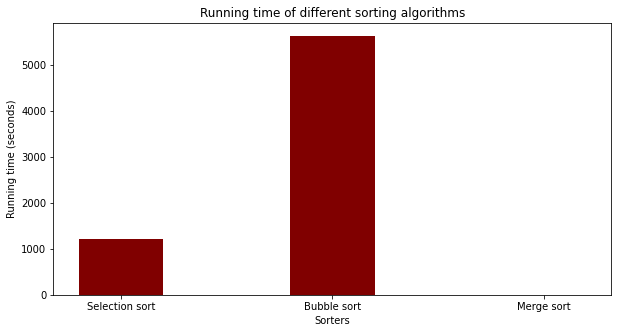

In [ ]:
merge_time = 2.3443410396575928
bubble_time = 5634.758148193359
selection_time = 1223.811371088028

# Visualize the times
# creating the dataset
data = {'Selection sort':selection_time, 'Bubble sort':bubble_time, 'Merge sort':merge_time}
sorters = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(sorters, values, color ='maroon',
        width = 0.4)

# create labels 
plt.xlabel("Sorters")
plt.ylabel("Running time (seconds)")
plt.title("Running time of different sorting algorithms")
plt.show()

## Question 4

**What is the most optimal algorithm, in your opinion, and why?**

From the three algorithms we have implemented, the merge sort algorithm is the most optimal, since it always has a running time of n log(n). You also see this if you look at the running times in question 3.

If we look in general at different sorting algorithms, quick sort seems to be preferred by most people, since on average it also has a complexity of n log(n). Nevertheless, this algorithm has a worst case running time of n^2, which is higher than the worst case of merge sort. Furthermore, quick sort is also not a stable algorithm, while merge sort is stable.